In [10]:
%reload_ext autoreload
%autoreload 2

In [11]:
import numpy as np
import matplotlib.pyplot as plt

In [12]:
import json

In [13]:
from models.surface_trap import SurfaceTrap
from models.surface_trap.plot import plot_voltages_on_trap
from pytrans.analysis import analyse_potential
from pytrans.plotting.plotting import plot_potential_make_layout

from pytrans.ions import Ca40

In [14]:
from pytrans.analysis.simulate1d import simulate_waveform_1d
from pytrans.analysis.simulate import simulate_waveform

In [15]:
trap = SurfaceTrap()
waveform = np.load('waveform.npy')

waveform = waveform[:len(waveform) // 2]
# waveform = np.concatenate([waveform, waveform[::-1]], axis=0)

In [16]:
import json

with open('r0.json', 'r') as fp:
    rj = json.load(fp)


In [17]:
x_eq = np.asarray(rj['mode_solver_results']['x_eq'])
x1 = x_eq[:, 0]

In [18]:
t = np.linspace(0, 25e-6, 400)
# t = np.linspace(0, 300e-6, 2000)
wf = waveform
trap.ion = Ca40

# t = np.linspace(0, 5e-6, 100)
# wf = [waveform[0]]
x0 = x1
# x2 = trap.x_ele(2)
# x0 = [x2 - 2e-6, x2 + 2e-6]
sim = simulate_waveform_1d(trap, wf, t, x0, slowdown=1)

2
Exec simulate_waveform_1d


100%|██████████| 1000/1000 [00:11<00:00, 87.04%/s]


- simulate_waveform_1d elapsed time: 11504.608 ms


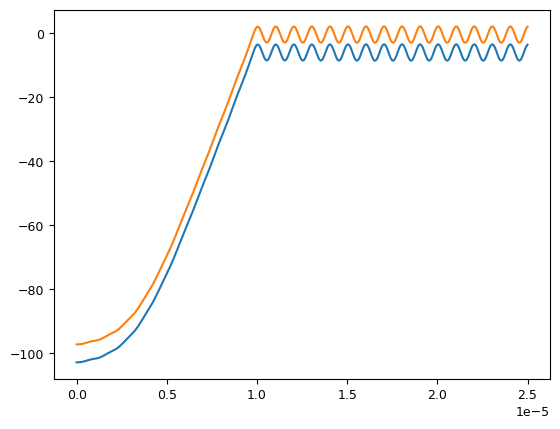

In [19]:
plt.plot(sim.t, sim.y[:len(x0)].T *1e6)

In [20]:
ions = [Ca40, Ca40]

# x2 = trap.x_ele(2)
# x2 = [x2 - 2e-6, x2 + 2e-6]
x0 = x_eq.copy()
# x0[:, 0] = [x2 - 2e-6, x2 + 2e-6]

bounds = [(-200e-6, 100e-6), (-10e-6, 10e-6), (trap.z0 - 10e-6, trap.z0 + 10e-6)]

sim3d = simulate_waveform(trap, wf, ions, t, dt=trap.dt, x0=x0, bounds=bounds)


Exec simulate_waveform


100%|██████████| 1000/1000 [01:33<00:00, 10.73%/s]


- simulate_waveform elapsed time: 93234.500 ms


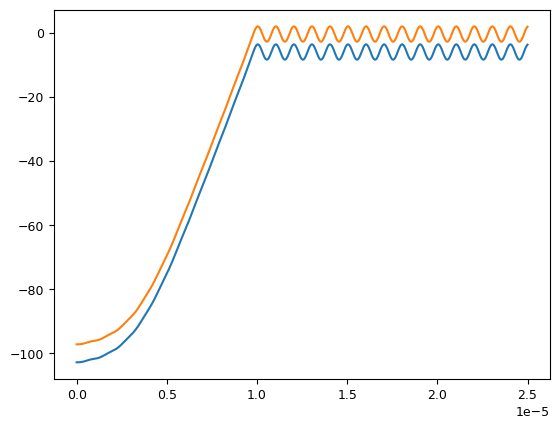

In [21]:
plt.plot(sim3d.t, sim3d.x[:, :, 0] * 1e6)
# plt.plot(sim.t, sim.y[:len(x0)].T *1e6)


In [22]:
sim3d.message


'The solver successfully reached the end of the integration interval.'

In [23]:
sim3d.y_events

[array([], dtype=float64)]

In [24]:
sim3d.y.shape

(12, 400)

In [25]:
y = sim3d.y[:, 0]
y.shape

N, d = 2, 3
x = y[:N * d]

In [26]:
bounds = [(-200e-6, 0), (-10e-6, 10e-6), (trap.z0 - 10e-6, trap.z0 + 10e-6)]

In [27]:
_x0 = 1e-6
b0 = np.tile([b[0] / _x0 for b in bounds], N)
b1 = np.tile([b[1] / _x0 for b in bounds], N)

def term(x):
    return 1 if np.all(np.bitwise_and(x >= b0, x <= b1)) else -1


In [28]:
terminate = []
for j in range(sim3d.y.shape[1]):
    y = sim3d.y[:, j]

    N, d = 2, 3
    x = y[:N * d]

    _t = term(x)
    terminate.append(_t)

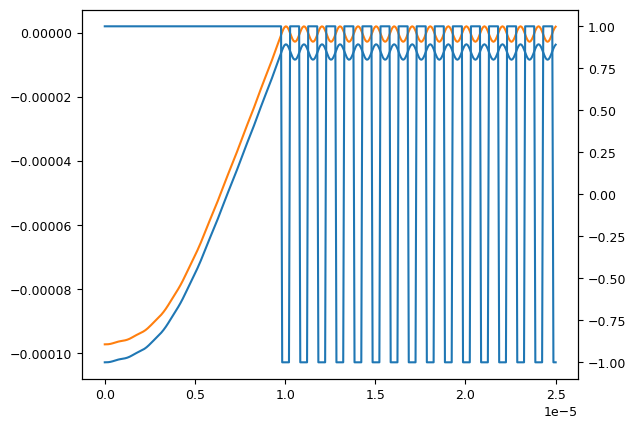

In [29]:
plt.plot(t, sim3d.x[:, :, 0])
ax2 = plt.gca().twinx()
ax2.plot(t, terminate)
